# Introduction to Quantitative Finance

Copyright (c) 2019 Python Charmers Pty Ltd, Australia, <https://pythoncharmers.com>. All rights reserved.

<img src="img/python_charmers_logo.png" width="300" alt="Python Charmers Logo">

Published under the Creative Commons Attribution-NonCommercial 4.0 International (CC BY-NC 4.0) license. See `LICENSE.md` for details.

Sponsored by Tibra Global Services, <https://tibra.com>

<img src="img/tibra_logo.png" width="300" alt="Tibra Logo">


## Module 2.1: Hypothesis Testing

### 2.1.1 Hypothesis Testing

Hypothesis testing is a formal method of testing your assumptions with data and statistics. With hypothesis testing, we create two (or more) competing hypothesis and decide which is more likely. In a variety of circumstances, we consider something "unlikely" if it has less than 5% chance of happening, but note this would mean that this happens in 1 in 20 experiments *anyway, just due to chance*.

<img src="https://imgs.xkcd.com/comics/significant.png" title="'So, uh, we did the green study again and got no link. It was probably a--' 'RESEARCH CONFLICTED ON GREEN JELLY BEAN/ACNE LINK; MORE STUDY RECOMMENDED!'" alt="Significant">

(Above comic from https://xkcd.com/882/ Hint: count how many "per-colour" experiments were performed.)

A common hypothesis pair is the following:

* $H_0$, the Null hypothesis, is that any difference between the data in our sample, and the general population, is caused strictly by chance.
* $H_A$, the Alternative hypothesis, is that there is a significant difference.

The hypotheses must be mutually exclusive, as in it cannot be that both are true. They do not have to be exhaustive, i.e. account for all possible scenarios, but it is often the case. It is usually easier to compute the probability for $H_0$, i.e. $P(H_0)$ and then just compute $P(H_A) = 1 - P(H_0)$. This only applies if the pair is exhaustive.

For example, we might have a sample, say trading firms using statistical analysis for decision making. Our Null hypothesis is that these firms are no different to the *population*, which may be either "all trading firms" or "random people picking stocks". We set up an experiment (more below) and find that we have a 4% chance that our Null hypothesis would generate results this extreme.

We might then say that, because the chance is so low, we reject the Null hypothesis that any different is strictly by chance. 

Note that in this example, there is still a one in 25 chance of obtaining the result purely through "luck".

Importantly, this does *not* mean that we accept that using statistical analysis causing trading firms to profit more than normal. There may be some other factors involved that are causing the difference. While this might sound like [weasel words](https://en.wikipedia.org/wiki/Weasel_word), this type of inference happens all the time. For instance, firms using statistical analysis might get their advantage from simply a more careful and thorough analysis, rather than the specific statistical analysis they apply. They might be run by larger firms (who can afford the extra staff to do the statistical analysis and have access to more data), or many other factors.

It could also be simply by chance, as the above comic demonstrates.

This is a common logical fallacy called *Denying the antecedent*:
    
    If P, then Q.
    Therefore, if not P, then not Q.

Note that the conclusion above is **invalid** based solely on the condition. Our statistical tests generally tell us "not P", and we are left with a bit more evidence of "not Q", but never proof.

Be wary of this fallacy. Statistics is often pessimistic in this regard - it rarely tells you that you are correct, it generally just tells you if there is a strong chance you are wrong.


Another common pitfall, demonstrated by the above comic, is that when we run multiple tests at the same time, our notion of a probability threshold must change, otherwise it becomes **likely** that we observe a purely-by-chance outcome.

In [1]:
%run setup.ipy

#### Exercise

Suppose we had $n$ independent tests. In each test, there is a 5% likelihood that the effect we are measuring is "high", for however that is defined. If we run all $n$ tests, what is the likelihood that *at least one test* measures a positive, high, outcome, for given $n$ values:

- Two experiments
- Ten experiments
- Twenty experiments

The above results can be computed with a calculator (or by hand if you are fine with leaving a fraction).

#### Extended exercise

Write a program with a function that does the following:

- Compute 1000 random numbers from a normal distribution $N(0, 1)$
- Compute the mean of those values

Note the expected mean is 0.

Plot a histogram of the means from running this function 10,000 times. How many of the results have a mean of more than 0.166?

From your results here, note that even with *purely random data*, we can get very high differences between a same (running our function once) and the general population ($N(0, 1)$), just by chance in our we got our sample.

In [4]:
#1 - at least 1 = 1 - none
def prob(p, n):
    return 1-(1-p)**n

print(prob(0.05,2))
print(prob(0.05,10))
print(prob(0.05,20))

0.09750000000000003
0.4012630607616213
0.6415140775914581


0

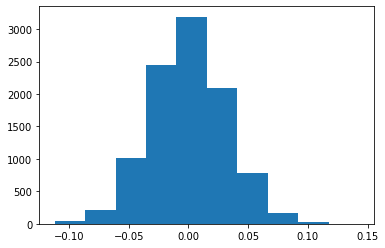

In [24]:
#2 - 
import numpy as np
import matplotlib.pyplot as plt

def rand_sample_mean(n):
    samp = np.random.randn(n)
    return np.mean(samp)

mean_list = []
for i in range(0,10000):
    mean_list.append(rand_sample_mean(1000))
    

plt.hist(mean_list)

(np.array(mean_list) > 0.166).sum()

#None, but if we reduce the sample size we get more

*For solutions, see `solutions/hypothesis_one.py`*

### Types of hypotheses

Any test of a hypothesis starts with a formal declaration of the hypothesis and its assumptions. Some general assumptions are things like "tests are independent of each other", "sample drawn at random from the population" and other factors that might reduce any latent causes that aren't being tested.

The Null hypothesis is a "business as normal" hypothesis. The new medicine doesn't work. The new strategy didn't make a difference to sales. The sample doesn't differ from the population.

The Alternative hypothesis is that our intervention caused some change. For instance, the new medicine reduces illness. Sales increased significantly from the new strategy. The sample is different from the population.

Normally we are interested in computing some statistic and then identifying what the likelihood is of that statistic having occurred by chance, based on our assumptions.

A commonly used method here is a p-test, where we are testing if a mean is different (>, <, $\neq$) to the population mean, when we assume the mean from a sample is otherwise drawn from a normal distribution. For instance, if we roll 100 dice, we get an expected value of 350, and a normal distribution of results centred around this value:


In [25]:
np.random.randint?

In [31]:
dice_rolls = np.random.randint(1, 7, size=100)
print(dice_rolls.sum())

359


In [32]:
sums = np.array([np.random.randint(1, 7, size=100).sum() for i in range(10000)])

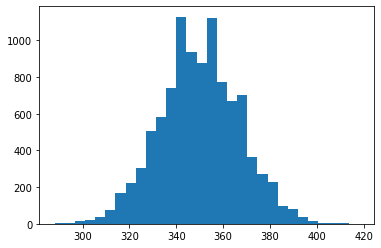

In [33]:
plt.hist(sums, bins=30);

If we suspected a dice to be "loaded", that is, it is more likely to come up with a given number, we might run an experiment. We might suspect this dice to roll higher numbers more frequently than lower numbers. Our hypothesis is:

$H_0$: The dice has a true expected value of 3.5

$H_A$: The dice has an expected value of significantly more than 3.5


We roll this suspect dice 100 times, and compute the mean. We get a total value of 410. We then do this experiment 3 more times, getting values of 420, 400, 405. This is unlikely, as it is an expected value of around 4.1. This would fit with our hypothesis, but how unlikely is it? We will look into this further in a later module, but for now, we can look up this value:

In [34]:
from scipy import stats

In [35]:
t_stat, p_val = stats.ttest_1samp([410, 420, 400, 405], 350)
print('t stat: {:.4f}, p value: {:4f}'.format(t_stat, p_val))

t stat: 13.7602, p value: 0.000831


The t-stat, while important, isn't really of value here. It is an intermediate statistic we then use to compute the p-value, which is what is normally needed here. The p-value is simply a probability, which you can get in any valid method you can think of. In this case, it is a statistical test "what is the probability of getting a t stat of this size by chance?".

#### Exercise

1. If we assume a confidence level of 0.05 qualifies as "significant", what can we say about our hypothesis?
2. As a percentage, what is the likelihood of the given samples being obtained by chance?
3. Can we suggest that the dice rolls values of 6 more frequently than other values?
4. Review the documentation for all of the `scipy.stats.ttest_???` functions and identify when each would be needed.


Note there are also T tests in the `statsmodels` package, which can be called in a similar way.


#### Extended Exercise

Create an alternative hypothesis and experiment to address question 3 above. How can we test if a dice rolls 6s more frequently?

1. Reject the null hypothesis, the dice is biased or more specifically the mean is significantly different to 350.
2. 0.08%
3. Not necessarily rolls more 6's
4. One sample t test used above

*For solutions, see `solutions/inferring_statistics.py`*

### Common problems and issues

### Large P values

If you do not get a lower p-value, you do not have a strong result. We cannot accept the null hypothesis, we just "fail to reject" it.

If we were to run our above statistic and get a p value of 0.2 (assuming a threshold of significance of 0.05), we do not "accept the null hypothesis", we simply fail to reject it at our significance level.


### Thresholds

It is important also to ensure the p value threshold is set *before* the experiment, and not after you get your results. If you do not, it is tempting to just "change" the threshold after you get your results. This removes any independence you had in your result, and the experimenter is effectively arbitrarily changing the result - why bother doing the test in this case?

A common value for the threshold is 0.05. There is no basis in this value, it is just "what is generally used". If your hypothesis is a matter of life or death, this value is probably too high. If it is of no great consequence, it might be too low. Reason about the value before blindly accepting on.

Also note that people are generally terrible dealing with low probabilities. The difference between a false positive of 0.02 and one of 0.01 is "one in fifty" compared to "one in one hundred". That's twice as likely for the first. Typically, it can be better to estimate with an intuitive "one in ..." amount, then convert that to a percentage.


### Multiple Simultaneous experiments

With modern computers able to run simulations continuously, and at scale, a common issue arising is that the p-value thresholds most commonly used (i.e. 0.05) are only valid for individual tests.

For example, suppose we had the following hypothesis:

$H_0$: Stock price changes are random for IBM on Mondays

$H_A$: Stock prices are more likely to drop on Mondays.


We might test this hypothesis and get a p value of 0.2, indicating there is insufficient evidence to reject the null hypothesis, and therefore do not automatically buy on Tuesdays after the drop.

We might then consider "does this pattern hold on any other day?". So we consider the same hypothesis, but for Tuesday, Wednesday, Thursday and Friday. We find the following significance levels:

* Monday: 0.2
* Tuesday: 0.1
* Wednesday: 0.8
* Thursday: 0.04
* Friday: 0.5

Aha! Thursdays have a *highly significant* effect. We fail to reject all other null hypothesis, accept the Thursday one, and start trading. 

What went wrong?


#### Exercise

1. Research the "Multiple comparisons problem" and identify a way to fix our hypothesis. We still want to check if any day has a significant value for our hypothesis, but we want to do it in a rigorous way.
2. Does our finding hold after adjusting? The solution uses one specific method of fixing the thresholds - if you choose another, then you may get another answer.

1. The more tests we do, the more likely we'll reject a hypothesis by chance. Hence, adjust the P-value for increased number of tests, for example the Bonferroni adjustment.
2. No it would not hold.

*For solutions, see `solutions/multiple_comparisons.py`*

### Simulations

A topic we will get into in more detail later, but a useful one to touch on here, is the use of simulations for computing p values. When testing a hypothesis, you can use a simulation of your null hypothesis, and then with that simulation, estimate the likelihood of findings like your sample. For instance:

$H_0$: The AUD/USD change is a random walk (that is, there is no pattern)

$H_A$: The AUD/USD change tends to follow the previous change with lag 1 (that is, if the previous change was up, it is more likely this change will be up too)


A little more formally, if we ignore "no change", we might say that $p$, the proportion of changes that are consistent with the previous change, is 50%, when we have:

$H_0: p = 0.5$

$H_A: p > 0.5$


To do this, we might analyse some data and find that we get a proportion with a value of 0.6, that is, the proportion of times that a change follows the previous change is 0.6 (60%). Is this "significant"?


<div class="alert alert-warning">That value above is artificial - we compute the real data in the exercise later</div>

To test this, we can create a simulation. In this simulation, we are focused on our null hypothesis - that there is no relationship between a change and the previous one. We might run our experiment for one year's worth of data (i.e. 365 changes), with each change randomly and uniformly chosen from "up" or "down". We then measure the proportion values to get our result from the simulation. Repeat many times, and you can then use this to estimate the p-value, or the probability that the null hypothesis is true.


#### Exercises

1. Download the USD/AUD prices from Quandl
2. Identify whether each change is "up" or "down" and compute the sample proportion value (it was 0.6 in the artificial data above)

#### Extended Exercise

1. Create and run the simulation mentioned above, where we simulate a random walk scenario and compute the proportion of times a change corresponds with the previous change.
2. Run the simulation many times
3. Compute the p value and determine whether to accept or reject the null hypothesis.

t stat: 13.7602, p value: 0.000831


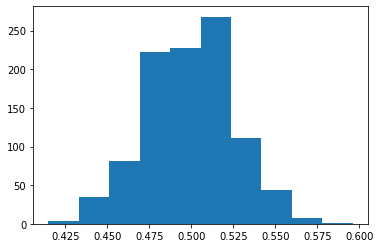

In [39]:
#from solutions
#1 
import quandl
xrate = quandl.get("RBA/FXRUSD-AUD-USD-Exchange-Rate")

#2
xdelta = xrate.diff().dropna()
xdelta['lag'] = xdelta['Value'].shift(1)
xdelta = xdelta.dropna()
xdelta['matched_movement'] = xdelta['Value']*xdelta['lag'] > 0 # compare values to lagged values
samp_prop = np.sum(xdelta['matched_movement'])/xdelta.shape[0] # get proportion of movements that match the previous movement
samp_prop


#Extended Exercise

iters = range(1000) #Repeat our experiment 1000 times.
results = []
distribution = stats.norm(0, 1)

for i in iters:
    X = distribution.rvs(365) # create randomly distributed data for a year
    data = pd.DataFrame([X[i] for i in range(len(X))])
    data.columns = ['Value']
    data['lag'] = data['Value'].shift(1)
    data = data.dropna()
    data['matched_movement'] = data['Value']*data['lag'] > 0 # compare values to lagged values
    data_prop = np.sum(data['matched_movement'])/data.shape[0]
    results.append(data_prop)

plt.hist(results)

stats.ttest_1samp(results, 0.5)
print('t stat: {:.4f}, p value: {:4f}'.format(t_stat, p_val))

*For solutions, see `solutions/hypothesis_two.py`*

### Tests for specific attributes

Often it is of use to know that data has a certain property, for instance it is normally distributed, correlated, or whether two samples are basically the same or not.


### Correlation between variables

These tests are designed to test whether two samples of data are independent of each other, or if a dependency exists:

$H_0$ the two samples tested are independent from each other

$H_A$ the two samples tested have a dependency between them

* Spearman's Rank Correlation, implemented as `scipy.stats.spearmanr`
* Pearson's correlation coefficient, implemented as `scipy.stats.pearsonr`
* Chi-Squared test, implemented as `scipy.stats.chi2_contingency` and `statsmodels.stats.proportion.proportions_chisquare`


### Gaussian Distribution Tests

There are a few tests designed to test that a distribution is Gaussian (normal). They include:

* The Shapiro-Wilk test, implemented as `scipy.stats.shapiro`
* D’Agostino’s $K^2$, implemented as `scipy.stats.normaltest`
* Kolmogorov-Smirnov, implemented as `scipy.stats.kstest` and `statsmodels.stats.diagnostic.kstest_normal`
* Anderson-Darling, implemented as `scipy.stats.anderson`

Each of the above tests against the hypothesis:

$H_0$ the data has a Gaussian distribution

$H_A$ the data does not have a Gaussian distribution


### Are two samples equal?

These tests assert that, given two samples, they are effectively equal (i.e. they came from the same distribution):

* Student's t-test, as identified earlier, implemented in quite a few methods in both scipy and statsmodels
* Analysis of Variance Test (ANOVA), `scipy.stats.f_oneway` and `statsmodels.api.stats.anova_lm` (among a few other ways to call it).
* Mann-Whitney U Test, implemented as `scipy.stats.manwhitneyu`
* Wilcoxon Signed Rank Test, implemented as `scipy.stats.wilcoxon`


Note that while the tests in these categories have the same purpose, they are not the same in terms of quality, speed, and even coding signatures! Always check the documentation for the function you are using first, before using it in practice.


#### Extended Exercise

Using a simulation, create your own function that can compute the t-test and p values for a Student's t-test.

For a comparison of two independent samples (i.e. "here are two samples, do they come from the same distribution?"), the t value is computed as:

$ t(X_1, X_2) = \frac{\bar{X_1} - \bar{X_2}}{s}$


Where:

* $\bar{X_1}$ is the mean of sample $X_1$
* s is the standard error of the difference, which is:

$e_1 = \frac{\sigma_1}{\sqrt(n_1)}$

Where $\sigma_1$ is the standard deviation of $X_1$ and $n_1$ is the number of observations in $X_1$, This is the "standard error" of $X_1$.

Then,

$s = \sqrt{e_1^2 + e_2^2}$

Which is the standard error of the difference between the means.

The output of your code should be a pandas DataFrame where the index values are the p-values we are testing (i.e. 0.01, 0.05, 0.1, 0.2) and the columns are the degrees-of-freedom, which is how many data points in both $X_1$ and $X_2$, subtracting 2. Values to compute are 5, 10, 20, 50, 100 (and so on if you are inclined).

The values can be computed via simulation - that is, draw many random samples, and compute the likelihood of getting a t value at least that high between them.

*For solutions, see `solutions/simulation_ttest.py`*